# Machine Learning (COSC 522)
## Project 4

## Initializations

In [1]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_formats = ['png']

import numpy as np
import matplotlib.pyplot as plt
from time import time
from pprint import pprint
import seaborn as sns
from scipy.stats import uniform, gaussian_kde, norm
from typing import *
from tqdm.notebook import tqdm

from custom_libs import ColorizedLogger

sns.set_style('darkgrid')

logger = ColorizedLogger('Project4', 'yellow')

### Load the two datasets and Preprocessing

In [2]:
# Located in <project root>/custom_libs/Project4
import custom_libs.Project4.data_loader as dl

In [3]:
# Create a Data Loader
datasets = ['xor', 'mnist']
data_loader = dl.DataLoader(datasets=datasets, data_folder='data')

In [4]:
# Print Statistics
data_loader.print_statistics()

2021-10-29 03:12:04 Data Loader  INFO     -- xor --
2021-10-29 03:12:04 Data Loader  INFO     	Shape: (4, 3)
2021-10-29 03:12:04 Data Loader  INFO     	Type: int64
2021-10-29 03:12:04 Data Loader  INFO     	Mean:
2021-10-29 03:12:04 Data Loader  INFO     		[0.5 0.5 0.5] (..)
2021-10-29 03:12:04 Data Loader  INFO     	Max:
2021-10-29 03:12:04 Data Loader  INFO     		[1 1 1] (..)
2021-10-29 03:12:04 Data Loader  INFO     	Min:
2021-10-29 03:12:04 Data Loader  INFO     		[0 0 0] (..)
2021-10-29 03:12:04 Data Loader  INFO     	Head:
2021-10-29 03:12:04 Data Loader  INFO     		[0 0 0] (..)
2021-10-29 03:12:04 Data Loader  INFO     -- mnist_tr --
2021-10-29 03:12:04 Data Loader  INFO     	Shape: (60000, 785)
2021-10-29 03:12:04 Data Loader  INFO     	Type: uint8
2021-10-29 03:12:04 Data Loader  INFO     	Mean:
2021-10-29 03:12:04 Data Loader  INFO     		[0. 0. 0. 0.] (..)
2021-10-29 03:12:04 Data Loader  INFO     	Max:
2021-10-29 03:12:04 Data Loader  INFO     		[0 0 0 0] (..)
2021-10-29 03:

In [5]:
# Get the two datasets
datasets = data_loader.get_datasets()
xor_data = datasets['xor']
mnist_tr, mnist_te, mnist_val = datasets['mnist']
print(xor_data)

[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]


## Task 1

In [144]:
def plot_results(losses, accuracies, subsample=100):
    losses_ = losses[::subsample]
    losses_ = list(zip(*losses_))    
    loss_names = []    
    loss_values= []

    for loss in losses_:
        loss_name, values = list(zip(*loss))
        loss_names.append(loss_name[0])
        loss_values.append(values)   
    
    accuracies_ = accuracies[::subsample]
    x = np.arange(1, len(accuracies_)+1)

    plt.plot(x, accuracies_, label='accuracies')
    for name, loss in zip(loss_names, loss_values):
        plt.plot(x, loss, label=name)
        
    plt.legend()

In [54]:
# Located in <project root>/custom_libs/Project4
import custom_libs.Project4.models as p4_models

In [125]:
n_units = [xor_data.shape[1]-1, 4, 3, xor_data[:, -1].max()+1]
activations = ["sigmoid", "sigmoid", "sigmoid"]
loss_functions = ['mse', 'cross_entropy']
lr = 1
batch_size = 1
max_epochs = 5000
shuffle = False
seed = 4
epochs_show_every = 500
batches_show_every = None
# debug = {'top': 3, 'ff': 3, 'bp': 3, 'w': 3}
debug = {'top': 2, 'ff': 0, 'bp': 0, 'w': 0}
mlp = p4_models.MultiLayerPerceptron(units=n_units, activations=activations, 
                                     loss_functions=loss_functions, seed=seed)
accuracies, losses = mlp.train(train=xor_data.copy(), shuffle=shuffle, 
                               batch_size=batch_size, lr=lr, 
                               max_epochs=max_epochs, debug=debug, 
                               epochs_show_every=epochs_show_every,
                               
                               batches_show_every=batches_show_every)


2021-10-29 12:35:56 Project4 Models INFO     Shapes of biases: [(4, 1), (3, 1), (2, 1)]
2021-10-29 12:35:56 Project4 Models INFO     Shapes of weights: [(4, 2), (3, 4), (2, 3)]
2021-10-29 12:35:57 Project4 Models INFO     Epoch: 500
2021-10-29 12:35:57 Project4 Models INFO       mse Loss: 0.00200
2021-10-29 12:35:57 Project4 Models INFO       cross_entropy Loss: 0.04554
2021-10-29 12:35:57 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-29 12:35:58 Project4 Models INFO     Epoch: 1000
2021-10-29 12:35:58 Project4 Models INFO       mse Loss: 0.00053
2021-10-29 12:35:58 Project4 Models INFO       cross_entropy Loss: 0.02315
2021-10-29 12:35:58 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-29 12:35:58 Project4 Models INFO     Epoch: 1500
2021-10-29 12:35:58 Project4 Models INFO       mse Loss: 0.00029
2021-10-29 12:35:58 Project4 Models INFO       cross_entropy Loss: 0.01716
2021-10-29 12:35:58 Project4 Models INFO       Accuracy on training data:

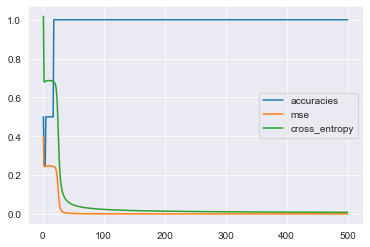

In [145]:
plot_results(accuracies=accuracies, losses=losses, subsample=10)

## Task 2

In [15]:
print(mnist_tr.shape)
print(mnist_te.shape)
print(mnist_val.shape)

(60000, 785)
(5000, 785)
(5000, 785)


In [29]:
dataset = mnist_tr

n_units = [dataset.shape[1]-1, 32, dataset[:, -1].max()+1]
activations = ["sigmoid", "sigmoid", "sigmoid"]
lr = 1
batch_size = 1000
max_epochs = 5
shuffle = False
seed = 3
epochs_show_every = 1
batches_show_every = 1
# debug = {'top': 3, 'ff': 3, 'bp': 3, 'w': 3}
debug = {'top': 2, 'ff': 0, 'bp': 0, 'w': 0}
mlp = p4_models.MultiLayerPerceptron(units=n_units, activations=activations, seed=seed)
accuracies, losses = mlp.train(train=dataset.copy(), shuffle=shuffle, 
                               batch_size=batch_size, lr=lr, 
                               max_epochs=max_epochs, debug=debug, 
                               epochs_show_every=epochs_show_every,
                               batches_show_every=batches_show_every)

2021-10-28 22:35:30 Project4 Models INFO     Shapes of biases: [(32, 1), (10, 1)]
2021-10-28 22:35:30 Project4 Models INFO     Shapes of weights: [(32, 784), (10, 32)]
2021-10-28 22:35:30 Project4 Models INFO     Epoch: 1
2021-10-28 22:35:30 Project4 Models INFO       Batch: 0
2021-10-28 22:35:52 Project4 Models INFO       Loss: 9.49778
2021-10-28 22:35:52 Project4 Models INFO       Accuracy on training data: 7283 / 60000
2021-10-28 22:35:52 Project4 Models INFO       Batch: 1
2021-10-28 22:36:13 Project4 Models INFO       Loss: 6.31520
2021-10-28 22:36:13 Project4 Models INFO       Accuracy on training data: 7369 / 60000
2021-10-28 22:36:13 Project4 Models INFO       Batch: 2
2021-10-28 22:36:33 Project4 Models INFO       Loss: 5.37047
2021-10-28 22:36:33 Project4 Models INFO       Accuracy on training data: 7675 / 60000
2021-10-28 22:36:33 Project4 Models INFO       Batch: 3
2021-10-28 22:36:52 Project4 Models INFO       Loss: 5.15745
2021-10-28 22:36:52 Project4 Models INFO       Ac

2021-10-28 23:01:45 Project4 Models INFO       Accuracy on training data: 5621 / 60000
2021-10-28 23:01:45 Project4 Models INFO       Batch: 33
2021-10-28 23:02:05 Project4 Models INFO       Loss: 4.72005
2021-10-28 23:02:05 Project4 Models INFO       Accuracy on training data: 5623 / 60000
2021-10-28 23:02:05 Project4 Models INFO       Batch: 34
2021-10-28 23:02:19 Project4 Models INFO       Loss: 4.71316
2021-10-28 23:02:19 Project4 Models INFO       Accuracy on training data: 5605 / 60000
2021-10-28 23:02:19 Project4 Models INFO       Batch: 35
2021-10-28 23:02:32 Project4 Models INFO       Loss: 4.70656
2021-10-28 23:02:32 Project4 Models INFO       Accuracy on training data: 5596 / 60000
2021-10-28 23:02:32 Project4 Models INFO       Batch: 36
2021-10-28 23:02:46 Project4 Models INFO       Loss: 4.69665
2021-10-28 23:02:46 Project4 Models INFO       Accuracy on training data: 5649 / 60000
2021-10-28 23:02:46 Project4 Models INFO       Batch: 37
2021-10-28 23:03:00 Project4 Models 

TypeError: 'float' object is not subscriptable

[0.0912, 0.0908, 0.0962, 0.0962, 0.0958, 0.0956, 0.0946, 0.0944, 0.094, 0.0944, 0.095, 0.0944, 0.0938, 0.093, 0.0926, 0.0928, 0.0926, 0.0922, 0.092, 0.0918] [array([0.00016545]), array([0.00010679]), array([7.2739585e-05]), array([5.30970949e-05]), array([4.20866045e-05]), array([2.455242e-05]), array([2.15945915e-05]), array([1.94101641e-05]), array([1.7638579e-05]), array([1.61105814e-05]), array([1.47102292e-05]), array([1.37071808e-05]), array([1.28347773e-05]), array([1.20676977e-05]), array([1.13862421e-05]), array([1.07682594e-05]), array([1.02131748e-05]), array([9.72510642e-06]), array([9.28245296e-06]), array([8.87746172e-06])]


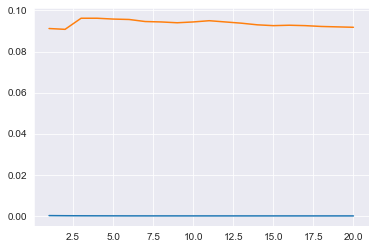

In [22]:
print(accuracies, losses)

plot_results(losses, accuracies, 1)

In [ ]:
i

In [ ]:
F

## Task 3